In [26]:
import pandas as pd

sales = pd.read_csv('vgsales.csv', dtype={
    'platform': 'category',
    'publisher': 'category',
    'genre': 'category',
}).dropna()

#sales = sales[(sales.platform == 'NES') | (sales.platform == 'SNES')]

features = ['sales', 'publisher', 'genre', 'year']
X = pd.get_dummies(sales[features])
y = sales['platform']
X

,sales,year,publisher_10TACLE Studios,publisher_1C Company,publisher_20th Century Fox Video Games,publisher_2D Boy,publisher_3DO,publisher_49Games,publisher_505 Games,publisher_5pb,...,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
0,82.74,2006.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40.24,1985.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35.82,2008.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,33.00,2009.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,31.37,1996.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.01,2002.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16594,0.01,2003.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16595,0.01,2008.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,0.01,2010.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(min_samples_split=3200)

cross_val_score(clf, X, y, cv=5).mean()

/home/jncraton/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.27248330213107735

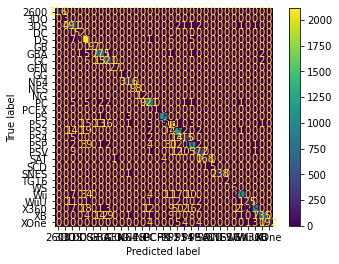

In [31]:
from sklearn.metrics import plot_confusion_matrix

clf.fit(X, y)

plot_confusion_matrix(clf, X, y)

In [46]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf, {
    "min_samples_split": [2,10,20,40,80,160,400,800,1600,3200,6400]
})
gs.fit(X, y)

gs.best_params_

/home/jncraton/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'min_samples_split': 3200}